# Сглаживание как способ быстрого решения негладких задач 

$$
\min_x f(x)
$$

Основано на статье [Smooth minimization of non-smooth functions](https://www.math.ucdavis.edu/~sqma/MAT258A_Files/Nesterov-2005.pdf) by Y. Nesterov

## Текущие достижения для выпуклых функций

- Функция $f$ негладкая

$$
\epsilon \sim O\left(\frac{1}{\sqrt{k}}\right), \quad k \sim O\left(\frac{1}{\epsilon^2}\right)
$$

- Функция негладкая, но имеет структуру $f = h + g$, где $h$ - гладкая выпуклая, $g$ - негладкая выпуклая

    - Проксимальный градиентный метод  

    $$
    \epsilon \sim O\left(\frac{L}{k}\right), \quad k \sim O\left(\frac{L}{\epsilon}\right)
    $$

    - Ускоренный проксимальный градиентный метод
    
    $$
    \epsilon \sim O\left(\frac{L}{k^2}\right), \quad k \sim O\left(\sqrt{\frac{L}{\epsilon}}\right)
    $$

## Вдохновляющий вывод и мотивирующий вопрос

Знание структуры функции позволяет получить быстро сходящиеся методы по сравнению с методами, которые воспринимают функцию, как чёрный ящик.

**Вопрос**: какая ещё структура негладкой функции позволяет использовать методы для минимизации гладких функций?

## План получения гладких аппроксимаций негладких функций

- Применять быстрые методы для негладких функций, как они есть, нельзя
- Вместо этого можно (почему и как именно будет изложено далее) ввести их гладкую аппроксимацию $f_{\mu}$
- Заменить $f$ на $f_{\mu}$ и решить задачу

$$
\min f_{\mu}(x)
$$

ускоренными методами для **гладких** задач

## Баланс между точностью и скоростью

- Параметр $\mu$ регулирует гладкость $f_{\mu}$
- Сложность решения задачи 

$$
\min f_{\mu}(x)
$$

зависит от $\frac{L_{\mu}}{\epsilon_{\mu}}$, где $L_{\mu}$ - константа Липшица градиента функции $f_{\mu}$.

- Большое значение $L_{\mu}$ даёт более высокую точность аппроксимации, но приводит к замедлению метода для гладкой задачи - уменьшение сглаживания
- Малое значение для $L_{\mu}$ приводит к быстрой сходимости метода, но $f_{\mu}$ менее точно аппроксимирует $f$ 

## Пример: функция Хьюбера (Huber function)

- $f(x) = |x|$
- Функция Хьюбера

$$
h_{\mu}(x) = \begin{cases} \dfrac{x^2}{2\mu} & |x| \leq \mu \\ |x| - \mu/2 & |x| \geq \mu  \end{cases}
$$

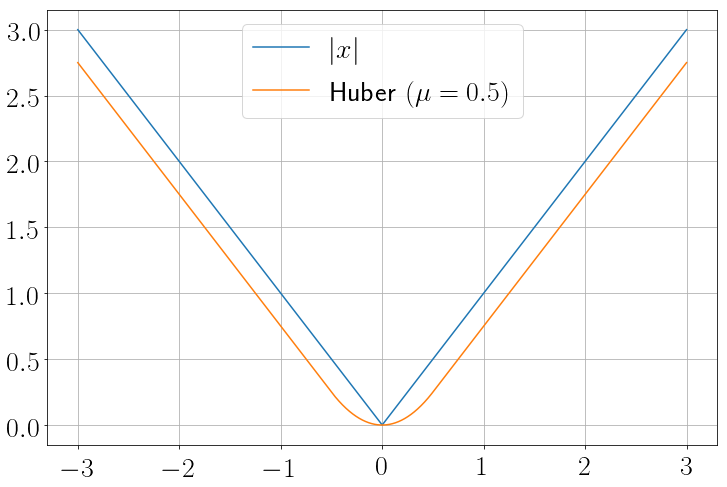

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc("text", usetex=True)

x = np.linspace(-3, 3, 10000)
f = np.abs(x)

def huber(x_range, mu):
    h = np.zeros_like(x_range)
    for i, x in enumerate(x_range):
        if np.abs(x) <= mu:
            h[i] = x**2 / (2 * mu)
        else:
            h[i] = np.abs(x) - mu / 2
    return h

mu = 0.5
huber_f = huber(x, mu)
plt.figure(figsize=(12, 8))
plt.plot(x, f, label="$|x|$")
plt.plot(x, huber_f, label=r"Huber $(\mu = {})$".format(mu))
plt.grid(True)
plt.xticks(fontsize=28)
plt.yticks(fontsize=28)
plt.legend(fontsize=28)

- Точность приближения

$$
|x| - \mu / 2 \leq h_{\mu}(x) \leq |x|
$$

- Степень гладкости

$$
h''_{\mu}(x) \leq \frac{1}{\mu}
$$

- **Вывод**: при малом $\mu$ действительно наблюдается повышение точности аппроксимации и уменьшение гладкости

## Пример: сглаживание в $\mathbb{R}^n$

- Задача

$$
\min f(x) = \min \|Ax - b\|_1
$$

- Сглаженная версия

$$
\min \sum_{i=1}^m h_{\mu}(a_i^{\top}x - b_i)
$$

- Точность сглаживания аналогично одномерному случаю

$$
f(x) -\frac{m\mu}{2} \leq f_{\mu}(x) \leq f(x)
$$

откуда получаем оценку на сходимость по функции

$$
f(x) - f^* \leq f_{\mu}(x) - f_{\mu}^* + \frac{m\mu}{2}
$$

- Если хотим $f(x) - f^* \leq \epsilon$, то точность для решения сглаженной задачи должна быть $\epsilon_{\mu} = \epsilon - m \mu / 2$

- Константа Липшица градиента для $f_{\mu}$

$$
L_{\mu} = \frac{\|A\|_2^2}{\mu}
$$

аналогично одномерному случаю + правила дифференцирования сложной функции (выведите это выражение!)

- Сложность работы ускоренного градиентного метода зависит от 

$$
\frac{L_{\mu}}{\epsilon_{\mu}} = \frac{\|A\|_2^2}{\mu(\epsilon - m \mu / 2)} = \left(\mu = \frac{\epsilon}{m}\right) = \frac{2m\|A\|_2^2}{\epsilon^2}
$$

тогда

$$
O\left(\sqrt{\frac{L_{\mu}}{\epsilon_{\mu}}}\right) = O\left(\frac{1}{\epsilon}\right)
$$

для ускоренного градиентного метода

- **Вывод**: использование сглаженной версии целевой **негладкой** функции привело к снижению скорости сходимости ускоренного градиентного метода с $O\left(\frac{1}{\sqrt{\epsilon}}\right)$ до $O\left(\frac{1}{\epsilon}\right)$. Но это всё ещё быстрее субградиентного метода!


## Эксперименты

In [2]:
import liboptpy.unconstr_solvers as methods
import liboptpy.step_size as ss


m, n = 500, 100
A = np.random.randn(m, n)
x_true = np.random.randn(n)
b = A.dot(x_true)

In [3]:
f = lambda x: np.linalg.norm(A.dot(x) - b, 1)
subgrad = lambda x: A.T.dot(np.sign(A.dot(x) - b))
alpha = 1e-3
s = 1e-1
sg_methods = {
    "SM 1/k": methods.fo.SubgradientMethod(f, subgrad, ss.InvIterStepSize()),
    "SM fixed={}".format(alpha): methods.fo.SubgradientMethod(f, subgrad, ss.ConstantStepSize(alpha)),
    "SM scaled fix, s={}".format(s): methods.fo.SubgradientMethod(f, subgrad, 
                                                  ss.ScaledConstantStepSize(s)),
}

In [4]:
x0 = np.random.randn(n)
max_iter = 50000

In [5]:
for m in sg_methods:
    _ = sg_methods[m].solve(x0=x0, max_iter=max_iter)

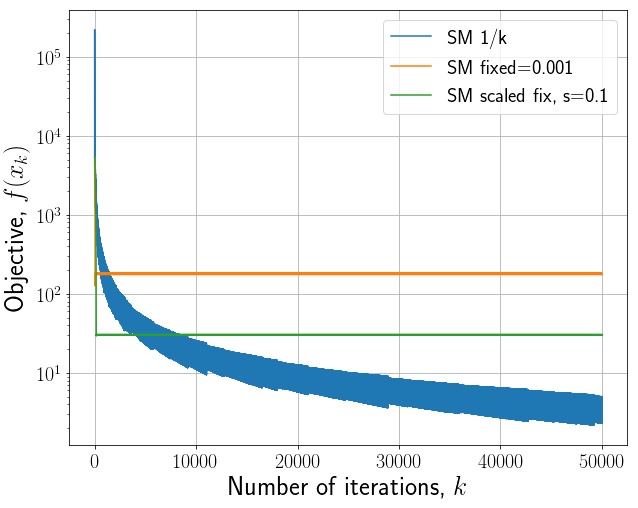

In [6]:
plt.figure(figsize=(10, 8))
for m in sg_methods:
    plt.semilogy([f(x) for x in sg_methods[m].get_convergence()], label=m)
plt.legend(fontsize=20)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Objective, $f(x_k)$", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

In [8]:
def huber(x, mu):
    res = np.zeros_like(x)
    res[np.abs(x) <= mu] = x[np.abs(x) <= mu]**2 / (2 * mu)
    res[np.abs(x) >= mu] = np.abs(x[np.abs(x) >= mu]) - mu / 2
    return res

def grad_huber(x, mu):
    res = np.zeros_like(x)
    res[np.abs(x) <= mu] = x[np.abs(x) <= mu] / mu
    res[np.abs(x) >= mu] = np.sign(x[np.abs(x) >= mu])
    return res

In [38]:
mu = 1e-2
print(mu)
fmu = lambda x: np.sum(huber(A.dot(x) - b, mu))
grad_fmu = lambda x: A.T @ grad_huber(A.dot(x) - b, mu)

0.01


In [39]:
grad_methods = {
    "GD Armijo": methods.fo.GradientDescent(fmu, grad_fmu, ss.Backtracking("Armijo", beta=0.1, rho=0.5, init_alpha=1)),
    "GD": methods.fo.GradientDescent(fmu, grad_fmu, ss.ConstantStepSize(mu/np.linalg.norm(A, 2)**2)),
    "Fast GD": methods.fo.AcceleratedGD(fmu, grad_fmu, ss.ConstantStepSize(mu/np.linalg.norm(A, 2)**2))
}

In [40]:
max_iter = 10000
for m in grad_methods:
    _ = grad_methods[m].solve(x0=x0, max_iter=max_iter)

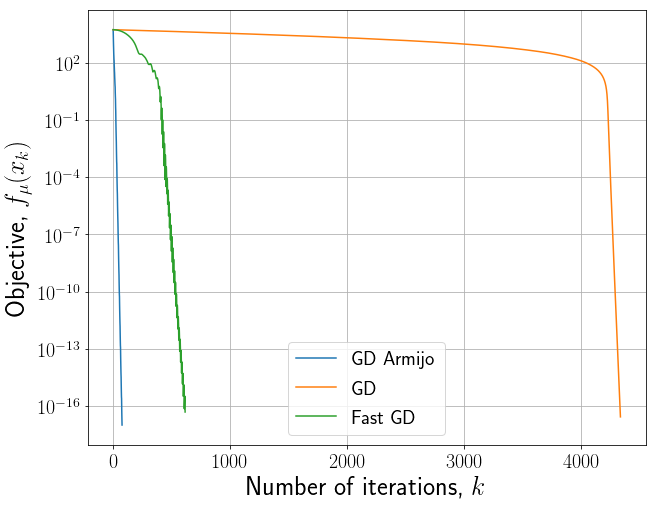

In [41]:
plt.figure(figsize=(10, 8))
for m in grad_methods:
    plt.semilogy([fmu(x) for x in grad_methods[m].get_convergence()], label=m)
plt.legend(fontsize=20)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Objective, $f_{\mu}(x_k)$", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

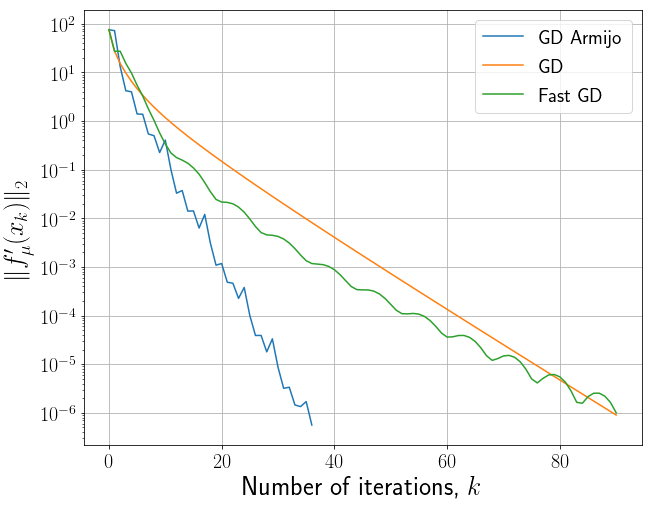

In [35]:
plt.figure(figsize=(10, 8))
for m in grad_methods:
    plt.semilogy([np.linalg.norm(grad_fmu(x)) for x in grad_methods[m].get_convergence()], label=m)
plt.legend(fontsize=20)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"$\|f_{\mu}'(x_k)\|_2$", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

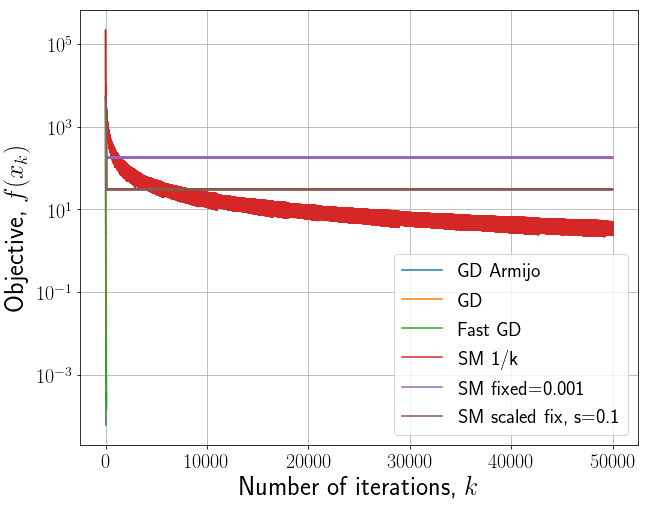

In [36]:
plt.figure(figsize=(10, 8))
for m in grad_methods:
    plt.semilogy([f(x) for x in grad_methods[m].get_convergence()], label=m)
for m in sg_methods:
    plt.semilogy([f(x) for x in sg_methods[m].get_convergence()], label=m)
plt.legend(fontsize=20)
plt.xlabel(r"Number of iterations, $k$", fontsize=26)
plt.ylabel(r"Objective, $f(x_k)$", fontsize=26)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.grid(True)

In [37]:
for m in grad_methods:
    x_m = grad_methods[m].get_convergence()[-1]
    print(m, "\n\t", np.linalg.norm(x_true - x_m), f(x_m) - f(x_true))
    
for m in sg_methods:
    x_m = sg_methods[m].get_convergence()[-1]
    print(m, "\n\t", np.linalg.norm(x_true - x_m), f(x_m) - f(x_true))

GD Armijo 
	 2.6014402907100545e-07 6.040524572514805e-05
GD 
	 5.89433634403845e-07 0.00013030218210163813
Fast GD 
	 6.349364675965661e-07 0.00014354988502118804
SM 1/k 
	 0.004185645514404477 2.3261183919007795
SM fixed=0.001 
	 0.304643101537041 176.1711792473743
SM scaled fix, s=0.1 
	 0.05079104910769336 29.922310898435576


## Откуда взялась функцию Хьюбера и ей подобные?

- **Теорема 1.** Если $x^*$ точка минимума для сильно выпуклой функции $f$ с константой $m > 0$, то $x^*$ единственная такая точка и 

$$
f(y) \geq f(x^*) + \frac{m}{2} \|x^* - y\|^2_2, \quad y \in \mathrm{dom}(f)
$$

- Сопряжённая функция к $f$

$$
f^*(y) = \sup_x \; (y^{\top}x - f(x))
$$

выпукла всегда


### Сопряжённая функция к сильновыпуклой функции

**Теорема.** Если $f$ - сильно выпуклая функция с константой $m$, сопряжённая к которой 

$$
f^*(y) = \sup_{x} \; (y^{\top}x - f(x))
$$

тогда 

- $f^*$ определена и дифференцируема для всех $y$ и при этом

$$
\nabla f^*(y) = \arg\max_{x} \; (y^{\top}x - f(x))
$$

- $\nabla f^*(y)$ удовлетворяет условию Липшица с константой $\frac{1}{m}$ 

#### Доказательство (часть 1)

_1._ Так как $f(x)$ - сильно выпуклая функция, то у функции $y^{\top} x - f(x)$ единственная точка максимума для каждого $y$. Обозначим её $x_y$

_2._ В силу условия оптимальности выполнено

$$
y = f'(x_y) \quad f^*(y) = \langle y, x_y \rangle - f(x_y)
$$

_3._ Тогда для произвольного $u$ выполнено

$$
f^*(u) = \sup_v \; (u^{\top}v - f(v)) \geq u^{\top}x_y - f(x_y) = x_y^{\top}(u - y) + x_y^{\top}y - f(x_y)  = x_y^{\top}(u - y) + f^*(y)
$$

_4._ То есть по определению субдифференциала $x_y \in \partial f^*(y)$, но так как $x_y$ единственная точка максимума функции $y^{\top} x - f(x)$, то $\partial f^*(y) = \{x_y\}$ и функция $f^*$ дифференцируема

_5._ В итоге $\nabla f^*(y) = x_y$

### Доказательство (часть 2)

1. Рассмотрим две точки $u$ и $v$, в которых соответственно

$$
x_u = \nabla f^*(u) \quad x_v = \nabla f^* (v)
$$

2. Тогда по теореме 1, приведённой выше и применённой к сильно выпуклой функции $f(x) - y^{\top}x$

\begin{align*}
& f(x_u) + v^{\top}x_u \geq f(x_v) + v^{\top}x_v + \frac{m}{2}\| x_v - x_u \|^2_2\\
& f(x_v) + u^{\top}x_v \geq f(x_u) + u^{\top}x_u + \frac{m}{2} \| x_v - x_u \|^2_2
\end{align*}

3. Сложим оба неравенства и получим

$$
m \| x_v - x_u \|^2_2 \leq (x_u - x_v)^{\top}(u - v) \leq \|x_u - x_v\|_2 \|u - v\|_2
$$

или

$$
\| \nabla f^* (v) - \nabla f^*(u) \|_2 \leq \frac{1}{m}\| u - v\|_2
$$

4. Таким образом, $\nabla f^* (u)$ Липшицев с константой Липшица $\frac{1}{m}$ 

### Функция близости (proximity function)

- **Определение**. Функция $d$ называется функцией близости на выпуклом замкнутом множестве $C$ если
    - она непрерывна и сильно выпукла на этом множестве
    - $C \subseteq \mathrm{dom} f$
    
- Центром множества будем называть точку

$$
x_d = \arg\min_{x \in C} d(x)
$$

- Дополнительные предположения: 
    - $d$ 1-сильно выпукла
    - $\inf_{x \in C} d(x) = 0$
    
- Тогда выполнено

$$
d(x) \geq \frac{1}{2}\|x - x_d\|_2^2, \quad x \in C
$$

### Примеры

- $d(x) = \frac{1}{2}\|x - u\|_2^2$ для $x_d = u \in C$
- $d(x) = \sum_{i=1}^n w_i (x_i - u_i)^2 / 2$ при $w_i > 1$ и $x_d = u \in C$
- $d(x) = \sum_{i=1}^n x_i\log x_i + \log n$ для $C = \{ x \mid x \geq 0, \; x_1 + \ldots + x_n = 1 \}$ и $x_d = \frac{1}{n}\mathbf{1}$

## Сглаживание через сопряжение

- Пусть негладкая выпуклая функция $f$ представима в виде

$$
f(x) = \sup_{y \in \mathrm{dom}(h)} \; ((Ax + b)^{\top}y - h(y)) = h^*(Ax+ b),
$$

где $h$ - выпукла, замкнута и имеет ограниченную область определения

- Тогда выберем функцию близости $d$ на $C = \mathrm{dom}(h)$ и построим функцию

$$
f_{\mu}(x) = \sup_{y \in \mathrm{dom}(h)} \; ((Ax + b)^{\top}y - h(y) - \mu d(y)) = (h + \mu d)^*(Ax + b)
$$

- Функция $f_{\mu}(x)$ будет гладкой, так как функция $h + \mu d$ - сильно выпукла с константой $\mu$

### Примеры для $f(x) = |x|$

- Представление через сопряжённую функцию

$$
f(x) = \sup_{-1\leq y \leq 1} xy = h^*(x), \quad h(y) = I_{[-1, 1]}
$$

- Функция близости $d(y) = \frac{y^2}{2}$ даёт функцию Хьюбера

$$
f_{\mu}(x) = \sup_{-1\leq y \leq 1} \left(xy - \mu \frac{y^2}{2}\right) 
$$

- Функция близости $d(y) = 1 - \sqrt{1 - y^2}$ даёт другую аппроксимацию

$$
f_{\mu}(x) = \sup_{-1\leq y \leq 1} \left(xy - \mu \left(1 - \sqrt{1 - y^2}\right)\right) = \sqrt{x^2 + \mu^2} - \mu
$$

### Градиент гладкой аппроксимации

$$
f_{\mu}(x) = \sup_{y \in \mathrm{dom}(h)} \; ((Ax + b)^{\top}y - h(y) - \mu d(y)) = (h + \mu d)^*(Ax + b)
$$

- Градиент

$$
\nabla f_{\mu}(x) = A^{\top} \arg\max_{y \in \mathrm{dom}(h)} \; ((Ax + b)^{\top}y - h(y) - \mu d(y))
$$

- Его константа Липшица

$$
L_{\mu} = \frac{\|A\|_2^2}{\mu}
$$

### Точность аппроксимации и сложность решения сглаженной задачи

- Точность аппроксимации

$$
f(x) - \mu D \leq f_{\mu}(x) \leq f(x), \quad D = \sup_{y \in \mathrm{dom}(h)} d(y)
$$

    - Оценка сверху
    
$$
f_{\mu}(x) \leq \sup_{y \in \mathrm{dom}(h)} \; ((Ax + b)^{\top}y - h(y)) = f(x)
$$
    - Оценка снизу
    
\begin{align*}
f_{\mu}(x) & = \sup_{y \in \mathrm{dom}(h)} \; ((Ax + b)^{\top}y - h(y) - \mu d(y)) \\
& \geq \sup_{y \in \mathrm{dom}(h)} \; ((Ax + b)^{\top}y - h(y) - \mu D) = f(x) - \mu D
\end{align*}

- Сложность аналогична примеру с функцией Хьюбера будет $O\left( \frac{1}{\epsilon}\right)$ при решении гладкой задачи ускоренным градиентным методом


## Основные шаги

- Представить негладкую функцию в виде сопряжённой к некоторой другой выпуклой функции $h$ с ограниченной областью определения
- Найти подходящую функцию близости $d$ для множества $\mathrm{dom}(h)$
- Сопряжённая функция к функции $h + \mu d$ будет гладкой аппроксимацией исходной негладкой функции $f$

## Сглаживание через регуляризацию Moreau-Yosida

- Рассмотрим выпуклую и негладкую функцию $g$
- Для неё построим следующую функцию

$$
g_{\mu}(x) = \inf_{y} \left( g(y) + \frac{1}{2\mu}\|y - x\|_2^2 \right) = \left(g \square \frac{1}{2\mu}\| \cdot\|_2^2\right)(x),
$$

где $\square$ обозначает инфимальную конволюцию двух функций

- Из свойств инфимальной конволюции следует, что $g_{\mu}$ выпукла


### Почему будет сглаживание?

- Перепишем $g_{\mu}(x)$ в виде

\begin{align*}
g_{\mu}(x) & = \frac{1}{2\mu}\|x\|_2^2 + \inf_y \left(g(y) - \frac{1}{\mu} y^{\top}x + \frac{1}{2\mu}\|y\|_2^2 \right) \\
& = \frac{1}{2\mu}\|x\|_2^2 - \frac{1}{\mu}\sup_y \left( y^{\top}x - \left( \mu g(y) + \frac{1}{2}\| y \|_2^2 \right)  \right) \\ 
& = \frac{1}{2\mu}\|x\|_2^2 -\frac{1}{\mu} \left( \mu g + \frac{1}{2}\| \cdot \|_2^2  \right)^*(x)
\end{align*}

- Второе слагаемое есть сопряжённая функция к сумме выпуклой и сильной выпуклой функции, а значит является гладкой по ранее доказанной теореме

### Вычислим градиент

\begin{align*}
g'_{\mu}(x) &= \frac{x}{\mu} - \frac{1}{\mu}\arg\max_y \left( y^{\top}x - \left( \mu g(y) + \frac{1}{2}\| y \|_2^2 \right) \right) \\
& = \frac{x}{\mu} - \frac{1}{\mu}\arg\min_y \left( \mu g(y) + \frac{1}{2}\|y - x\|_2^2  \right) \\
& = \frac{x}{\mu} - \frac{1}{\mu} prox_{\mu g}(x)
\end{align*}

Таким образом, получаем следующую интерпретацию проксимального метода

$$
x_{k+1} = prox_{\mu g}(x_k) = x_k - \mu g'_{\mu}(x_k)
$$

как градиентного спуска для сглаженной аппроксимации исходной функции.

### Совпадение точек минимума

**Теорема.** $x^*$ точка минимума функции $g$ iff $x^*$ точка минимума для $g_{\mu}$

**Доказательство**

_1._ $x^*$ точка минимума функции $g$ iff $x^* = prox_{g}(x^*)$

_2._ Если $x^*$ точка минимума $g$, тогда $x^* = prox_{g}(x^*) = x^* - \mu g'_{\mu}(x^*)$, то есть $g'_{\mu}(x^*) = 0$, следовательно в силу выпуклости $g_{\mu}(x)$ точка $x^*$ и для неё является точкой минимума.

_3._ Если $x^*$ точка минимума для функции $g_{\mu}(x)$ тогда $g'_{\mu}(x^*) = 0$, но тогда $prox_{\mu g}(x^*) = x^*$, то есть $x^*$ неподвижная точка проксимального оператора и тем самым показано, что $x^*$ точка минимума $g$ 

## Связь между двумя подходами к сглаживанию

- Первый подход связан с представлением функции в виде сопряжённой к некоторой другой функции
- Второй подход - это регуляризация Moreau-Yosida
- Запишем $g_{\mu}(x)$ в таком виде

$$
g_{\mu}(x) = \inf_y \left( g(y) + \frac{1}{2\mu} \|x - y\|_2^2 \right) = \inf_y \left( g(y) + \frac{1}{2\mu} \|z\|_2^2 \right) \quad \text{s.t. } x - y = z
$$

- Построим двойственную задачу к этой задаче минимизации

$$
L(y, z, \lambda) = g(y) + \frac{1}{2\mu} \|z\|_2^2 + \lambda^{\top}(x - y - z)
$$

- Сгруппируем слагаемые

$$
L(y, z, \lambda) =  (g(y) - \lambda^{\top}y) + \left(\frac{1}{2\mu} \|z\|_2^2 - \lambda^{\top}z\right) + \lambda^{\top}x
$$

- Двойственная функция

$$
\inf_{y, z} L(y, z, \lambda) = \inf_{y} (g(y) - \lambda^{\top}y) - \frac{\mu}{2}\| \lambda \|_2^2 + \lambda^{\top}x = -g^*(\lambda) - \frac{\mu}{2}\| \lambda \|_2^2 + \lambda^{\top}x
$$

- В силу сильной двойственность 

$$
g_{\mu}(x) = \max_{\lambda} \left( \lambda^{\top}x -g^*(\lambda) - \frac{\mu}{2}\| \lambda \|_2^2 \right) = \left( g^* + \frac{\mu}{2} \|\cdot\|_2^2 \right)^*(x)
$$

- Сравним с результатом для первым подходом

$$
f_{\mu}(x) = (h + \mu d)^*(x),
$$

для $h$ такой что $f(x) = h^*(Ax + b)$

## Итоги сравнения

- Первый подход является обобщением подхода регуляризации Moreau-Yosida на произвольные функции близости $d$
- Также первый подход позволяет произвольно выбирать $h$ лишь бы выполнялось представление функции $f$
- На самом деле множество функции, которые подлежат сглаживанию не ограничивается рассмотренными: ключевая операция - это инфимальная конволюция
- Подробности [тут](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.307.7067&rep=rep1&type=pdf) в разделе 4.4.

## Всегда ли нужно применять сглаживание?

- Если задача имеет вид суммы двух негладких функций

$$
f(x) = g(x) + h(x),
$$

то как правильнее подходить к её решению?

- Напоминаю, что сглаживание даёт сходимость вида $O\left( \frac{1}{\epsilon}\right)$
- Поэтому делать задачу гладкой по обеим функциям $g$ и $h$ может быть нецелесообразно!
- Вместо этого стоит оставить как есть слагаемое, для которого легко вычислить проксимальный оператор, сгладить другое слагаемое и применить **ускоренный проксимальный градиентный метод**, чтобы получить сходимость порядка $O\left( \frac{1}{\epsilon}\right)$

## Резюме

- Изложенная техника сглаживания применима для довольно большого набора функций, которые представимы как сопряжённые к некоторой другой функции (conjugate-like functions)
- Выбор различных параметризаций и различных функций близости даёт раздличные гладкие аппроксимации
- Все они приводят к ускоренному получению решения исходной задачи по сравнению с субградиентным методом
- Однако добиться полного совпадения скоростей сходимости как в случае задачи композитной оптимизации не удаётся 